<a href="https://colab.research.google.com/github/2303A51269/AIML_LAB/blob/main/Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
%matplotlib inline


# **Loading the data**

In the classification task with decision trees, we will use a car dataset that is available

In [2]:
fetch_openml(data_id=5).keys

<function Bunch.keys>

In [3]:
from sklearn.datasets import fetch_openml
car_data = fetch_openml(name='car', version=2, parser='auto')

In [4]:
type(car_data)

sklearn.utils._bunch.Bunch

In [5]:
car_data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
car_data.feature_names, car_data.target.value_counts()

(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'],
 binaryClass
 P    1210
 N     518
 Name: count, dtype: int64)

In [7]:
#Data description
print(car_data.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

Binarized version of the original data set (see version 1). The multi-class target feature is converted to a two-class nominal target feature by re-labeling the majority class as positive ('P') and all others as negative ('N'). Originally converted by Quan Sun.

Downloaded from openml.org.


In [8]:
#diplaying feature names
car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [9]:
#Getting the whole dataframe
car_data = car_data.frame
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


In [10]:
type(car_data)

pandas.core.frame.DataFrame

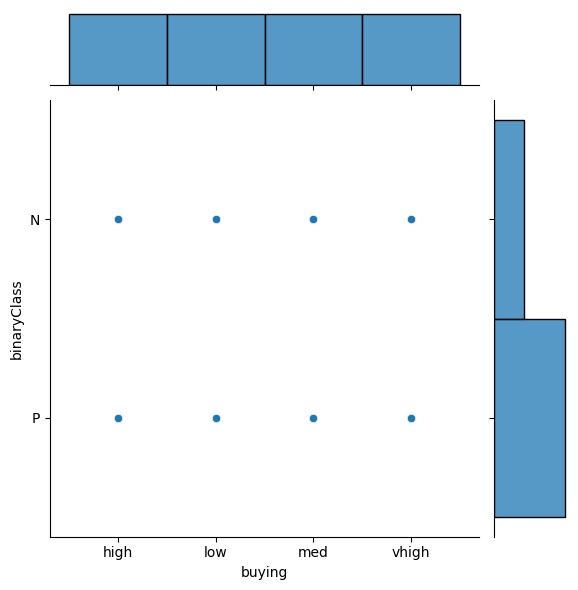

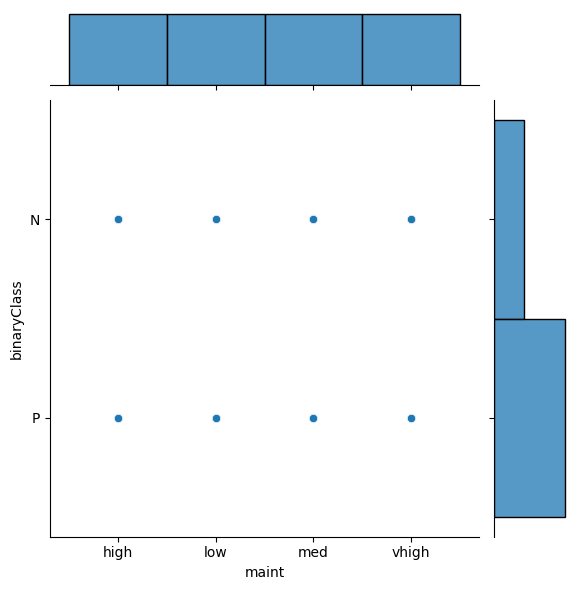

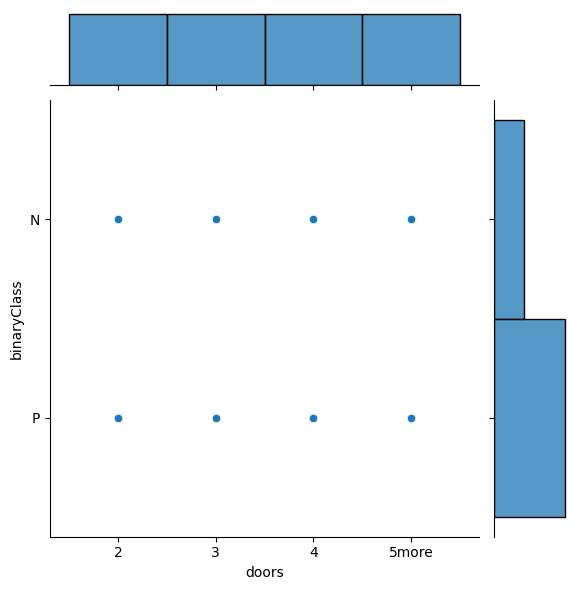

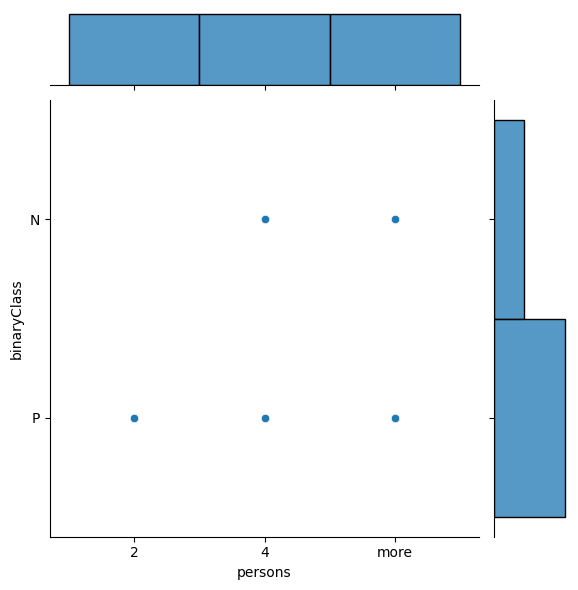

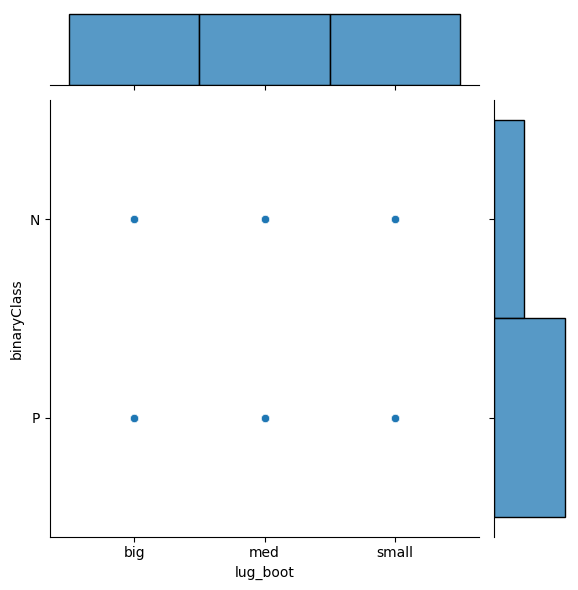

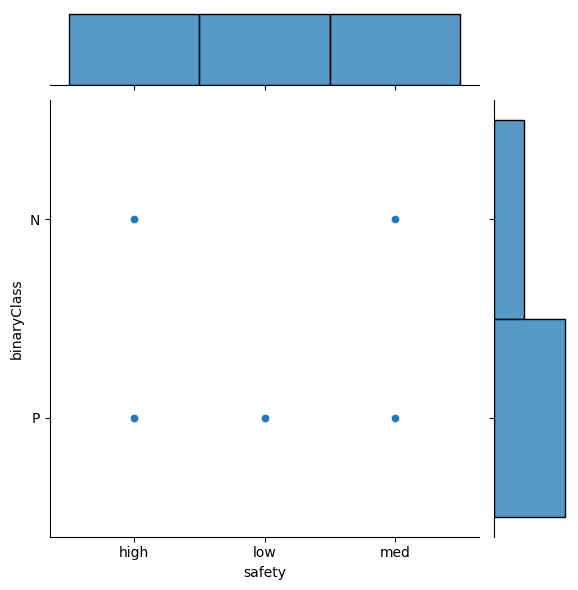

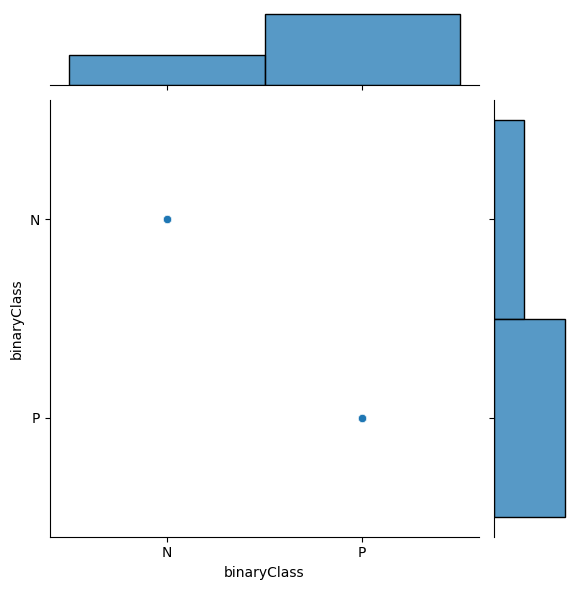

In [11]:
l = len(car_data.columns)
for i in range(l):
  sns.jointplot(x=car_data.columns[i], y='binaryClass', data = car_data, palette='rainbow')


# Splitting dataFrames

In [12]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(car_data, test_size=0.2, random_state=220)
#print('Dataset size:{}\ntraining data is: {}\n)
#testing data is :{}'.format(len(car_data), len(train_data), len(test_data))

car_data.shape, train_data.shape, test_data.shape

((1728, 7), (1382, 7), (346, 7))

# Checking Summary

In [13]:
train_data.describe()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
count,1382,1382,1382,1382,1382,1382,1382
unique,4,4,4,3,3,3,2
top,vhigh,med,2,2,small,high,P
freq,356,355,352,476,478,468,972


# Checking Missing Values

In [14]:
#checking missing values
train_data.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
binaryClass,0


#Checking Categorical Features

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1382 entries, 1697 to 732
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   buying       1382 non-null   category
 1   maint        1382 non-null   category
 2   doors        1382 non-null   category
 3   persons      1382 non-null   category
 4   lug_boot     1382 non-null   category
 5   safety       1382 non-null   category
 6   binaryClass  1382 non-null   category
dtypes: category(7)
memory usage: 21.3 KB


In [16]:
train_data['buying'].value_counts()

,count
buying,
vhigh,356
low,349
med,339
high,338


In [17]:
train_data['maint'].value_counts()

,count
maint,
med,355
vhigh,347
low,344
high,336


In [18]:
car_train = train_data.drop('binaryClass', axis=1)
car_labels = train_data[['binaryClass']]

In [19]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('ord_enc', OrdinalEncoder())
])
car_train_prepared = pipe.fit_transform(car_train)

Lets also handle labels.Labels contain P and N,

so we want t convert those into numbers.

In [20]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
car_labels_prepared = label_enc.fit_transform(car_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
car_train_prepared.shape, car_labels_prepared.shape

((1382, 6), (1382,))

# 5-Training Decision Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.set_params(class_weight='balanced', criterion='entropy')
tree_clf.fit(car_train_prepared, car_labels_prepared)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy')

Lets train the same model on the scaled data.

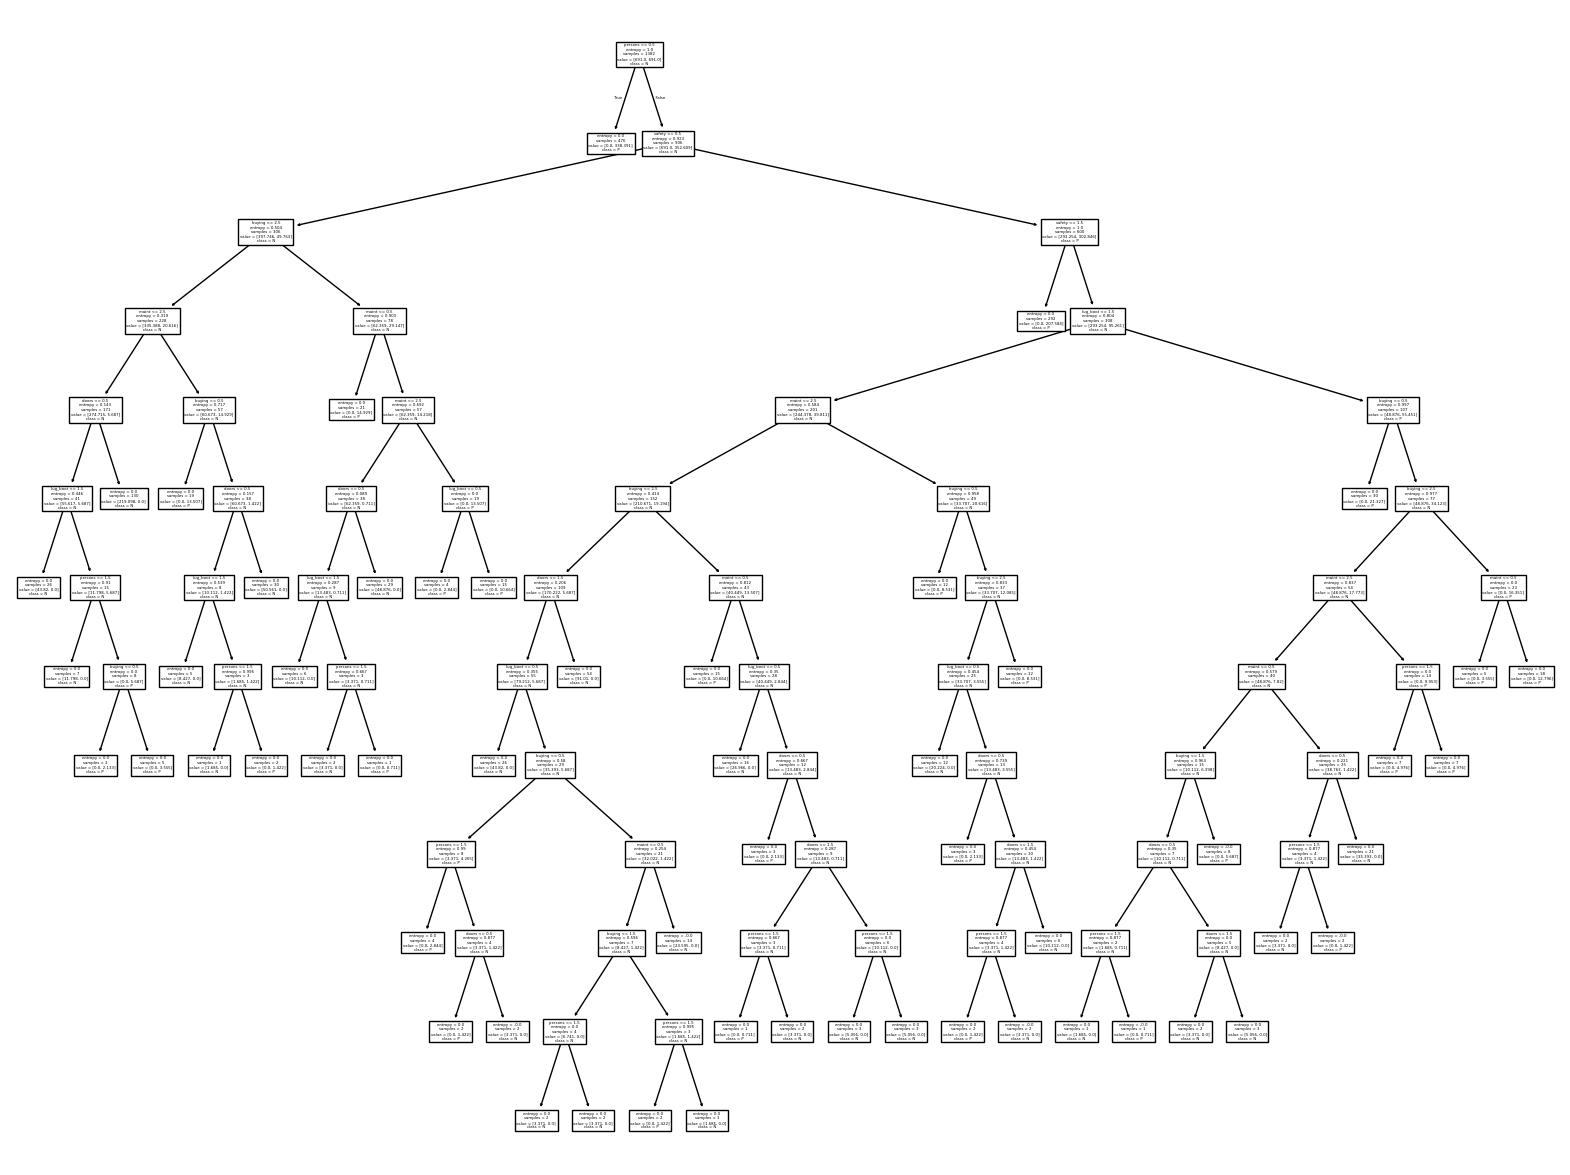

In [23]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(tree_clf, feature_names=car_train.columns, class_names=['N', 'P']);
#text_representation = export_text(tree_clf, feature_names=list(car_train))
#print(text_representation)

# 6 Evaluating the Decision Tree

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
preds = tree_clf.predict(car_train_prepared)
print(f"Accuracy:{accuracy_score(car_labels_prepared, preds)}")
print(f"ClassReport:{classification_report(car_labels_prepared, preds)}")
print(f"ConfusionMatrix:{confusion_matrix(car_labels_prepared, preds)}")


Accuracy:1.0
ClassReport:              precision    recall  f1-score   support

           0       1.00      1.00      1.00       410
           1       1.00      1.00      1.00       972

    accuracy                           1.00      1382
   macro avg       1.00      1.00      1.00      1382
weighted avg       1.00      1.00      1.00      1382

ConfusionMatrix:[[410   0]
 [  0 972]]


In [25]:
accuracy_score(car_labels_prepared,preds)

1.0